In [278]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import re
import mne
import pathlib
import openpyxl
from datetime import datetime
import pytz
import random
import os
from scipy import signal
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
import matplotlib
from matplotlib import pyplot as plt
import psutil
import gc



print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.7 (default, Sep 16 2021, 23:53:23) 
[Clang 12.0.0 ]
Pandas 1.3.1
Scikit-Learn 0.24.2
GPU is available


Globals

In [101]:
list1 = {"data": [1,2,3,4,5,6,7], "class": ['a', 'a', 'a', 'c', 'c', 'b', 'b' ]}

df = pd.DataFrame(list1)

In [102]:
df

,data,class
0,1,a
1,2,a
2,3,a
3,4,c
4,5,c
5,6,b
6,7,b


In [103]:
df = df[df['class'].isin(['b','a'])]
df

,data,class
0,1,a
1,2,a
2,3,a
5,6,b
6,7,b


In [117]:
cwd = os.getcwd()
FREQ = 500
database_path = 'Dataset/CHB-MIT/chb-mit-scalp-eeg-database-1.0.0/'
filtered_database_path = 'Dataset/CHB-MIT/Filtered-chb-mit/'
external_hardisk_drive_path = os.path.dirname('/Volumes/LaCie/Database/')
edf_file_type = ".edf"
compressed_file_type = ".csv"
file = "/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/ECG/patient_4_date_2019-05-20 1102590000.csv"


In [107]:
cwd

'/Users/niklashjort/Desktop/Notes/Speciale/projects/DataHandling/Køge'

In [125]:
files = []

for folder in os.listdir(external_hardisk_drive_path + "Køge_03/EEG/Csv/"):
    for filename in os.listdir(external_hardisk_drive_path + "Køge_03/EEG/Csv/" + folder + "/"):
        fullpath = external_hardisk_drive_path + "Køge_03/EEG/Csv/" + folder + "/" + filename
        files.append(fullpath)

In [118]:
os.chdir("/volumes/")
external_hardisk_drive_path = '/Volumes/NHR HDD/'
files = [external_hardisk_drive_path + "Køge_03/EEG/Csv/" + f for f in os.listdir(external_hardisk_drive_path + "Køge_03/EEG/Csv/") if f.endswith(compressed_file_type)]

In [119]:
files[0:5]

[]

In [126]:
def get_info_text():
    with open(external_hardisk_drive_path + "/Køge_03/EEG/info.txt", 'r') as f:
        str_container = ""
        formatted_str = []
        for line in f:
            str_container += str(line).replace("\n", "<br>")
            formatted_str = re.findall('(.*?)<br><br>', str_container)
        return formatted_str

info_obj = get_info_text()
        

In [277]:
names = "/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/EEG/Preictal/Preictal_3_patient_21_date_2020-06-16 1523290000.csv"

In [11]:
def find_frq(str_obj):
    frq_found = re.search(r"<br> freq: (.*?) <br>", str_obj)
    if(frq_found):
        return int(float(frq_found.group(1)))

def find_filename(str_obj):
    frq_found = re.search(r"filename: (.*?) <br>", str_obj)
    if(frq_found):
        return (frq_found.group(1))

find_frq("filename: patient_4_date_2019-05-21 1556430000 <br> freq: 500.0 <br> channels: ['CH-1', 'CH-2', 'CH-3', 'CH-4', 'CH-5', 'CH-6', 'CH-7', 'CH-8', 'x', 'y', 'z'] ")

500

In [272]:
FREQ = [find_frq(x) for x in info_obj if find_filename(x) in names][0] if len([find_frq(x) for x in info_obj if find_filename(x) in names]) > 0 else 500

In [13]:
def remove_cols(dataframe, col_start = 0, col_end = 0):
    if col_end == 0:
        col_end = len(dataframe.columns) - 1
    
    dataframe = dataframe.iloc[: , col_start: col_end]
    return dataframe

In [14]:
os.getcwd()

'/Users/niklashjort/Desktop/Notes/Speciale/projects/DataHandling/Køge'

In [127]:
for f in os.listdir("/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/EEG"):
    print(f)

.DS_Store
info.txt
Seizure
Interictal
Preictal


In [276]:
len(df)

13500

In [275]:
df = df.iloc[::2,:]

In [281]:
df = pd.read_csv("/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/EEG/Interictal/Preint_1_patient_4_date_2019-05-22 0901320000.csv", usecols=[1,2,3])

In [282]:
datetime.fromtimestamp((df['timestamp'][0:1+1]/1000).tolist()[0]).strftime('%H:%M:%S')

'09:01:32'

In [129]:
df.columns

Index(['class', 'timestamp', 'CH-1'], dtype='object')

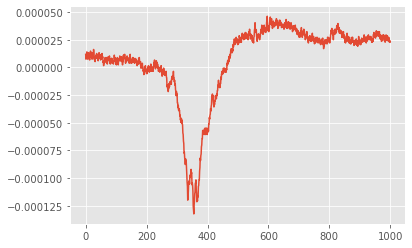

In [130]:
pltdf = df[0:1000]
plt.style.use('ggplot')
plt.plot(pltdf['CH-1'])

In [131]:
gc.collect()

2790

In [132]:
# print(test_df.info(memory_usage='deep'))
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [133]:
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Columns: 3 entries, class to CH-1
dtypes: float64(3)
memory usage: 632.9 KB


In [134]:
mem_usage(df)

'0.62 MB'

In [135]:
df.dtypes

class        float64
timestamp    float64
CH-1         float64
dtype: object

In [136]:
df.head()

,class,timestamp,CH-1
0,NaN,1.558509e+12,0.000012
1,NaN,1.558509e+12,0.000007
2,NaN,1.558509e+12,0.000009
3,NaN,1.558509e+12,0.000009
4,NaN,1.558509e+12,0.000014


In [137]:
def downcast_dtypes(df):
    _start = df.memory_usage(deep=True).sum() / 1024 ** 2
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype in ['int64', 'int32']]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    _end = df.memory_usage(deep=True).sum() / 1024 ** 2
    saved_time = (_start - _end) / _start * 100
    #print(f"Saved: {saved_time:.2f}%")
    return df

In [138]:
df = downcast_dtypes(df)

In [139]:
df['class'].value_counts()

Series([], Name: class, dtype: int64)

In [28]:
df.head()

,class,timestamp,CH-1
0,3.0,1.558479e+12,-7.627329e-07
1,3.0,1.558479e+12,-3.163425e-05
2,3.0,1.558479e+12,-4.334413e-05
3,3.0,1.558479e+12,-4.227960e-05
4,3.0,1.558479e+12,-2.311797e-05


In [29]:
df['class'] = df['class'].astype('int32')

In [155]:
def read_compressed_df(path):
    df = pd.read_csv(path, usecols=[1,2,3,4])

    channels = [item for item in list(df.columns) if item != "class" if item != "timestamp"]

    return (df, channels)

In [202]:
def get_window(channel, start_index, data, size = 4, overlap = 0, is_sezure = False, frequency = 500):
    if(is_sezure):
        overlap = 2
    else:
        overlap = overlap
    
    start = start_index * (size - overlap) * frequency
    end = start + (size * frequency)

    date_timestamp = ""

    try:
        date_timestamp = datetime.fromtimestamp((data['timestamp'][start:start+1]/1000).tolist()[0]).strftime('%H:%M:%S')
    except:
        date_timestamp = "datetime cannot be converted"
    
    return [data[channel][start:end].tolist(), date_timestamp]

In [141]:
def get_max_window_iteration(dataframe, buffer):
    len_of_df = int(len(dataframe) // (buffer*FREQ))
    return len_of_df


In [142]:
from scipy import signal

In [201]:
Fs = 500             # Define the sampling frequency,
interval = Fs        # ... the interval size,
overlap = Fs * 0.95  # ... and the overlap intervals

def spec_transform_save_to_folder(index, win, channel, patient_state, patient, plot_title = False):
    plt.figure(figsize=(7,7))
    series = win[0]
    time_of_observation = win[1]
    try:
        series = np.array(series).astype(np.float)
    except Exception as e:
        print(f"error: {e}")
        print(f"patient_state: {patient_state} channel: {channel} index: {index} window: {series}")
    denoised_series = denoise_wavelet(series, method='BayesShrink', mode='soft',rescale_sigma=True, multichannel=False, wavelet_levels=3)
    if plot_title:
        plt.title(f"{channel} : is_seizure = {patient_state} : {time_of_observation}")
    

    f, t, Sxx = signal.spectrogram(denoised_series, fs=Fs, nperseg=interval, noverlap=overlap)
                         
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='jet')



    #s,f,t,im = plt.specgram(denoised_series,Fs=256)
    #plt.ylim(0, 20)
    #plt.axis('off')
    
    # f, t, Sxx = signal.spectrogram(denoised_series, 1./FREQ, nfft=overlap, nperseg=int(256/2))
    # #plt.pcolormesh(t, f[0:20], Sxx[0:20])
    # plt.pcolormesh(t, f, 10*np.log10(Sxx))
    plt.show()
    # if patient_state == "seizure":
    #     plt.savefig(f'test_data//windows/Seizure2/{patient}_{index}_{channel}_{time_of_observation}.png', edgecolor='none', bbox_inches='tight')
    # elif patient_state == "interictal":
    #     plt.savefig(f'test_data//windows/Interictal/{patient}_{index}_{channel}_{time_of_observation}.png')
    # elif patient_state == "prei_one":
    #     plt.savefig(f'test_data//windows/test/Preictal_One/{patient}_{index}_{channel}_{str(time_of_observation).strip()}.png')
    # elif patient_state == "prei_two":
    #     plt.savefig(f'test_data/windows/Preictal_Two/{patient}_{index}_{channel}_{str(time_of_observation).strip()}.png')
    # plt.show()
    del series
    plt.clf()    
    plt.close()
    gc.collect()

In [204]:
count = 0
as_strided = np.lib.stride_tricks.as_strided
print("started file: " + str(file) + " index: " + str(count))
df, selected_channels = read_compressed_df("/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/EEG/Seizure/Seizure_0_patient_4_date_2019-05-22 0901320000.csv")
print(selected_channels)
patient = re.search('patient_(.*)_date_', file).group(1)
print(patient)
sz_count = 0
int_count = 0
count = 0
sz_win = []
inter_win =[]
for channel in selected_channels:
        sz_win = [get_window(channel=channel, start_index=i, data=df, is_sezure=True) for i in range(get_max_window_iteration(df, 2))]
        # for index, window in enumerate(sz_win):
        #     if sz_count > 1:continue
        #     sz_count += 1
        #     spec_transform_save_to_folder(channel=channel, index=index, win=window, patient_state="seizure", patient=patient, plot_title=True)
            
        count += 1


#del sz, prei_one, inter, df

started file: /Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/ECG/patient_4_date_2019-05-20 1102590000.csv index: 0
['CH-1', 'CH-2']
4


In [36]:

gc.collect()

0

In [37]:
len(inter_win)

3410

In [205]:
len(sz_win)

27

In [206]:
sze = sz_win[10][0]


Text(0.5, 1.0, 'Signal 500 Hz')

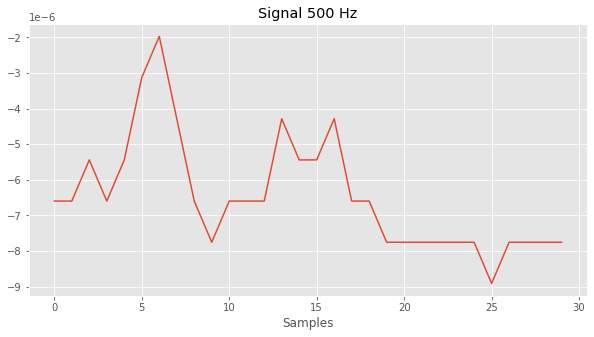

In [207]:
plt.figure(figsize=(10,5))
plt.plot(sze[0:30])
plt.xlabel("Samples")
plt.title("Signal 500 Hz")

No handles with labels found to put in legend.


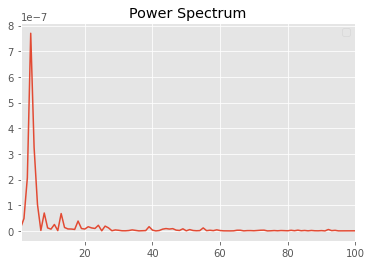

In [208]:
n = len(sze[0:500])
fourier_transform = np.fft.fft(sze[0:500], n)
PSD = fourier_transform * np.conj(fourier_transform)
freq = (1/(0.002*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')
plt.plot(freq[L], PSD[L])
plt.xlim(freq[L[0]], 100)
plt.title('Power Spectrum')
plt.legend()

In [42]:
import scipy.fftpack

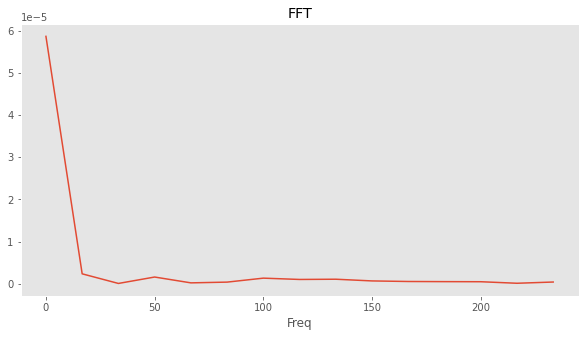

In [164]:
plt.figure(figsize=(10,5))
# Number of sample points
N = 30
# sample spacing
T = 1.0 / 500.0
x = np.linspace(0.0, N*T, N, endpoint=False)

yf = scipy.fft.fft(sze[0:30])
xf = scipy.fft.fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Freq")
plt.title("FFT")

plt.show()

In [44]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 00.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0, int(1.0/(2.0*T)), int(N/2))

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

ZeroDivisionError: float division by zero

In [ ]:
time = np.arange(len(inte))/500

In [ ]:
nyquist = 500 / 2.
b, a = signal.filter_design.iirfilter(3, (120. / nyquist, 121. / nyquist), rs=10,
                               ftype='cheby2')

In [ ]:
xfilt = signal.filtfilt(b, a, sz)

In [ ]:
plt.plot(xfilt)

NameError: name 'xfilt' is not defined

In [ ]:
win = 4 * 256
f, psd = signal.welch(sz,
               fs=1./256,  # sample rate
               window='hanning',   # apply a Hanning window before taking the DFT
               nperseg=256,        # compute periodograms of 256-long segments of x
               detrend='constant') # detrend x by subtracting the mean

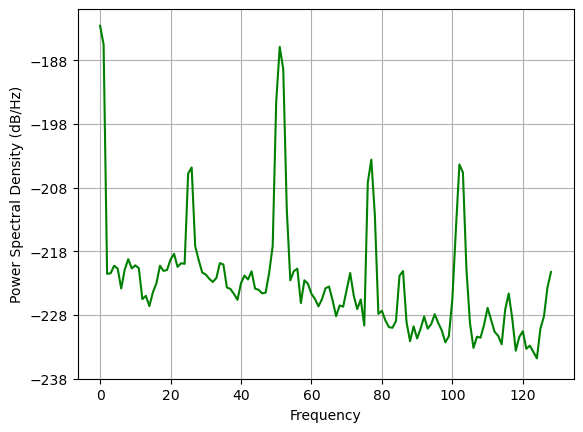

In [ ]:
plt.style.use('default')
plt.psd(np.array(sz)**2, Fs=256, color ="green")
lines = plt.gca().get_lines()
x_data = lines[0].get_data()[1]

In [ ]:
den_sz = denoise_wavelet(np.array(sze).astype(np.float),wavelet='db8', method='BayesShrink', mode='hard',rescale_sigma=True, multichannel=False, wavelet_levels=3)
den_inte = denoise_wavelet(np.array(inte).astype(np.float),wavelet='db8', method='BayesShrink', mode='soft',rescale_sigma=True, multichannel=False, wavelet_levels=3)


In [ ]:
Fs = 256         # Define the sampling frequency,
interval = 256       # ... the interval size,
overlap = interval * 0.99  # ... and the overlap intervals

/usr/local/Caskroom/miniforge/base/envs/speciale_01_01/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


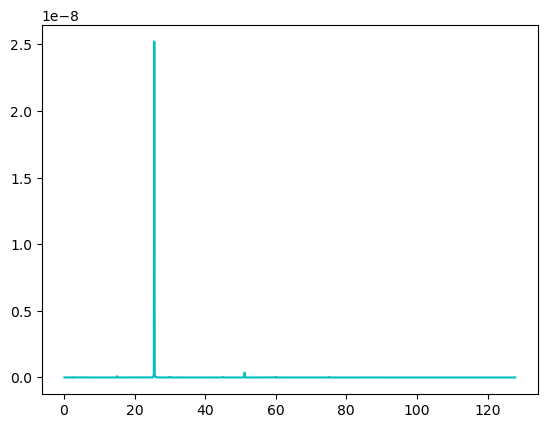

In [ ]:
dt = 1/256
n = len(inte)
fhat = np.fft.fft(inte, n)
PSD = fhat * np.conj(fhat / n)
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

plt.plot(freq[L], PSD[L], color='c')

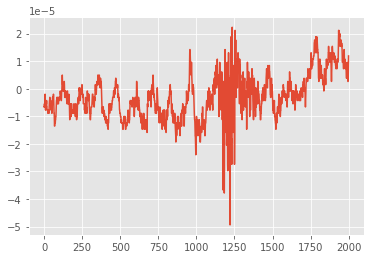

In [209]:
plt.plot(sze)
#plt.plot(den_inte)

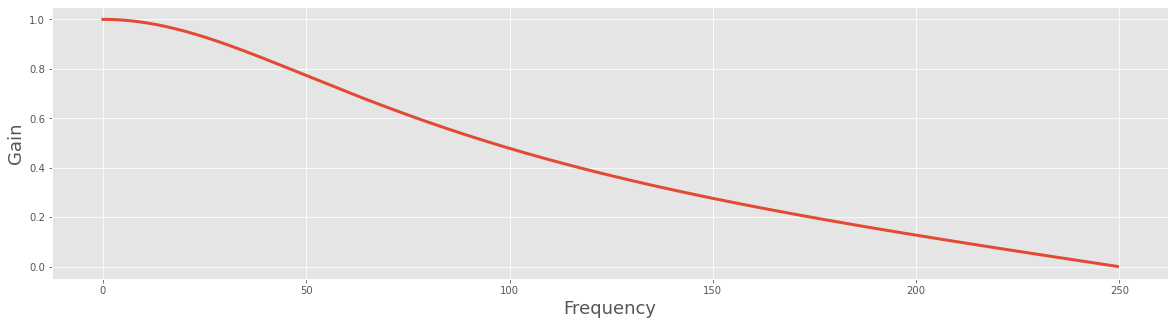

In [210]:
filter_order = 8
frequency_cutoff = 60
sampling_frequency = 500

def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    plt.figure(figsize=(20,5))
    w, h = signal.freqz(b, a, worN=256*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)

# Create the filter
b, a = signal.butter(1, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)
plot_filter(b, a, sampling_frequency)

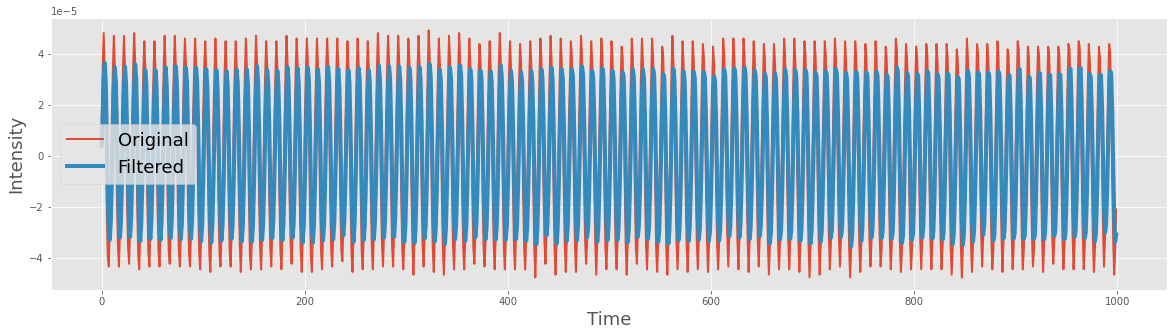

In [211]:
# Apply the filter
filtered_int = signal.lfilter(b, a, inte)
filtered_sz = signal.filtfilt(b, a, sze)

plt.figure(figsize=(20,5))
plt.plot(inte, linewidth=2)
plt.plot(filtered_int, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

In [216]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = signal.lfilter(b, a, data)
    return y

In [217]:
lowpass = butter_lowpass_filter(sze, 60, 500, order=6)

In [218]:
# Filtro taglia banda, passa alta
def butter_highpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    y = signal.lfilter(b, a, data)
    return y

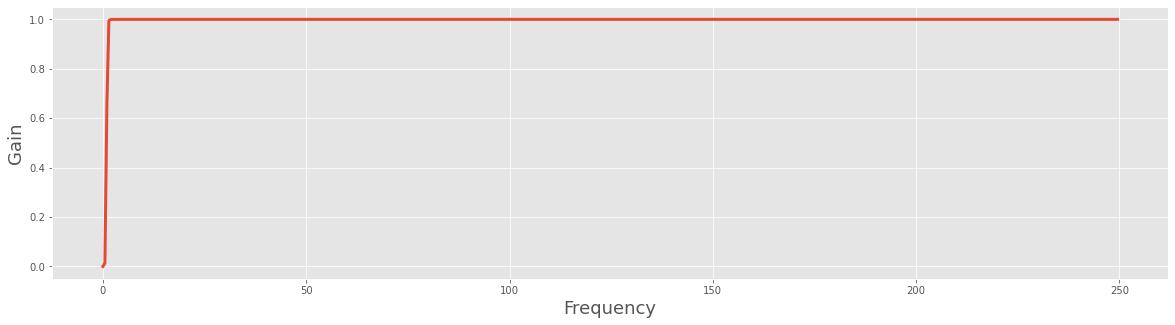

In [219]:
b, a = signal.butter(6, 1, btype='high', analog=False, fs=500)
plot_filter(b, a, 500)
cutoff=1
highpass = butter_highpass_filter(sze, cutoff, 500, order=6)

In [172]:
import matplotlib.pyplot as plt
from importlib import reload
import scipy
plt=reload(plt)

In [220]:
def butter_bandstop_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    i, u = signal.butter(order, [low, high], btype='bandstop')
    y = signal.lfilter(i, u, data)
    return y

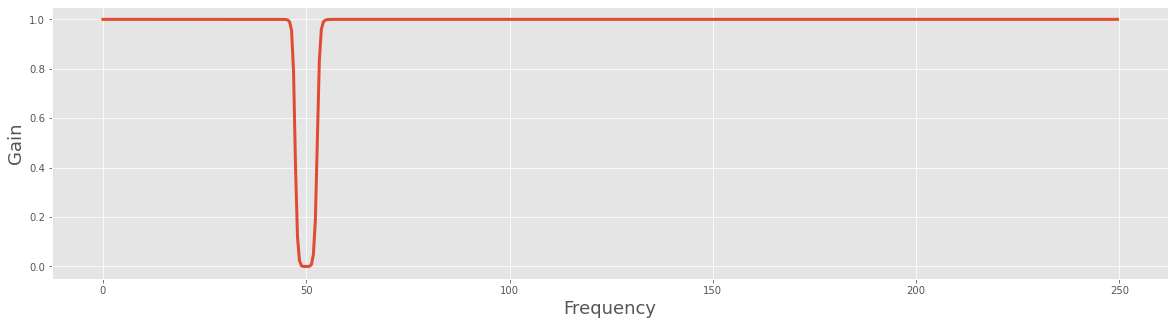

In [221]:
b, a = signal.butter(6, [47, 53], btype='bandstop', output='ba', fs=FREQ)
plot_filter(b, a, sampling_frequency)

In [222]:
lowcut=47
highcut=53

band_pass_50 = butter_bandstop_filter(sze, lowcut, highcut, FREQ, order=6)

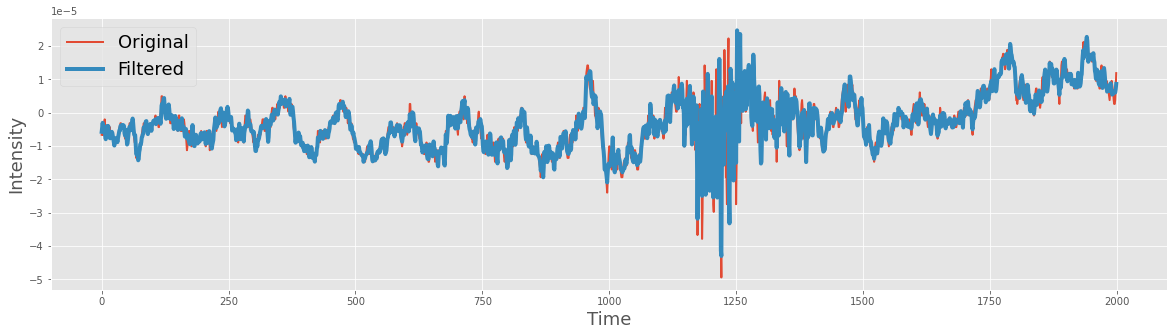

In [223]:
plt.figure(figsize=(20,5))
plt.plot(sze, linewidth=2)
plt.plot(band_pass_50, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

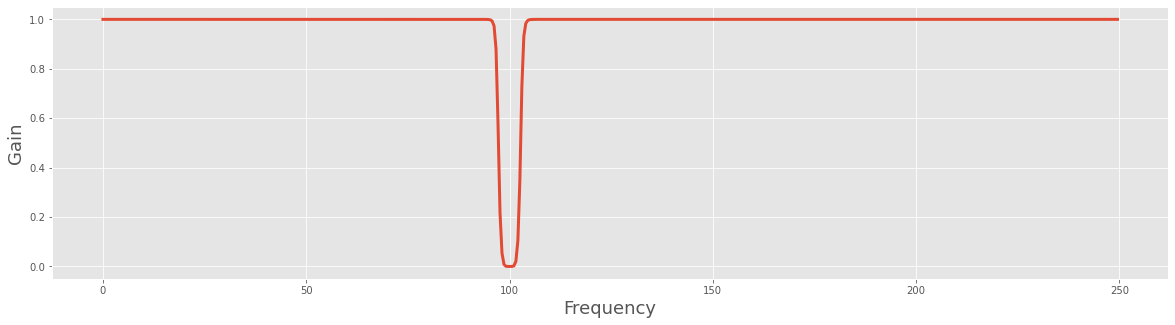

In [224]:
b, a = signal.butter(6, [97, 103], btype='bandstop', output='ba', fs=FREQ)
plot_filter(b, a, sampling_frequency)

Text(0, 0.5, 'Hz')

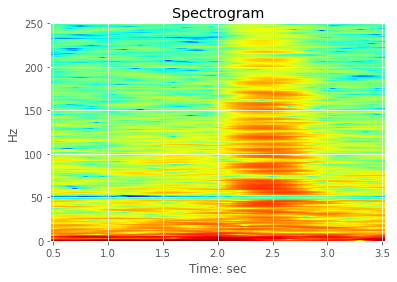

In [225]:

s,f,t,im = plt.specgram(band_pass_50,Fs=500,cmap='jet', NFFT=int(500), noverlap=int(500*0.95))
plt.title("Spectrogram")
plt.xlabel("Time: sec")
plt.ylabel("Hz")


In [226]:
band_pass_100 = butter_bandstop_filter(sze, 97, 103, FREQ, order=6)

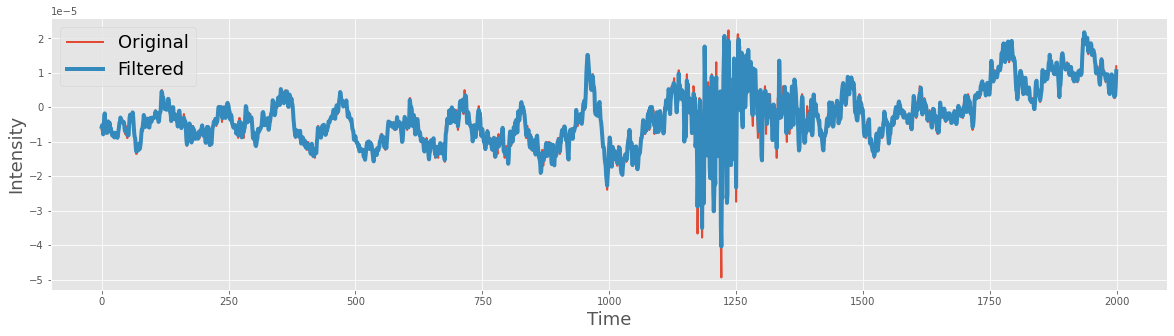

In [227]:
plt.figure(figsize=(20,5))
plt.plot(sze, linewidth=2)
plt.plot(band_pass_100, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

In [228]:
all = butter_bandstop_filter(sze, 97, 103, FREQ, order=6)
all = butter_bandstop_filter(all, 47, 53, FREQ, order=6)
all = butter_highpass_filter(all, 1, FREQ, order=6)

In [229]:
all_low = butter_bandstop_filter(sze, 97, 103, FREQ, order=6)
all_low = butter_bandstop_filter(all_low, 47, 53, FREQ, order=6)
all_low = butter_highpass_filter(all_low, 1, FREQ, order=6)
all_low = butter_lowpass_filter(all_low, 60, 500, order=6)

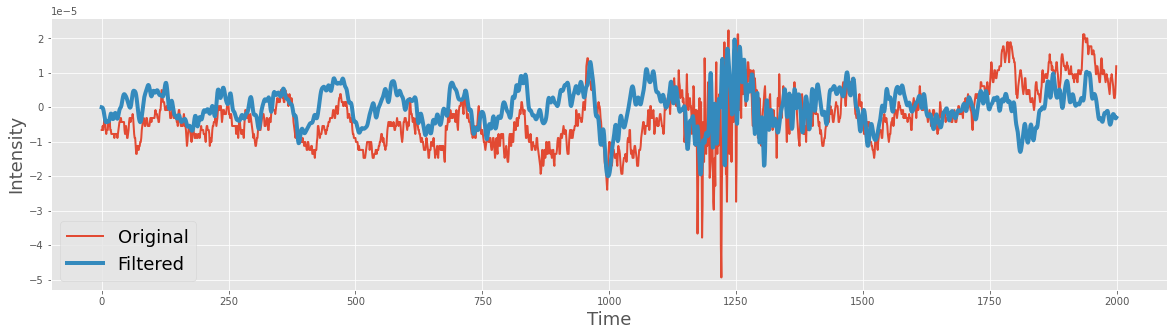

In [231]:

plt.figure(figsize=(20,5))
plt.plot(sze, linewidth=2)
plt.plot(all_low, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

Text(0, 0.5, 'Hz')

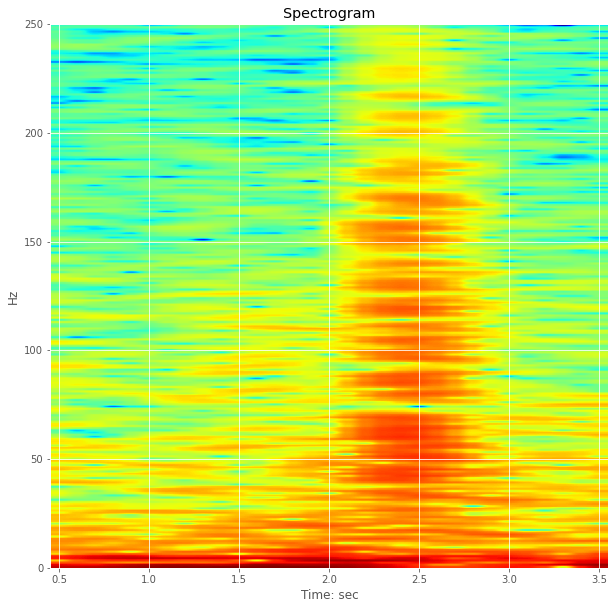

In [232]:
plt.figure(figsize=(10, 10))
s,f,t,im = plt.specgram(sze, Fs=500,cmap='jet', NFFT=int(500), noverlap=int(500*0.9))
#plt.ylim(0,120)
plt.title("Spectrogram")
plt.xlabel("Time: sec")
plt.ylabel("Hz")

In [ ]:
s.shape

(251, 31)

In [ ]:
y = s[:120]
y.shape

(120, 7)

NameError: name 'axs' is not defined

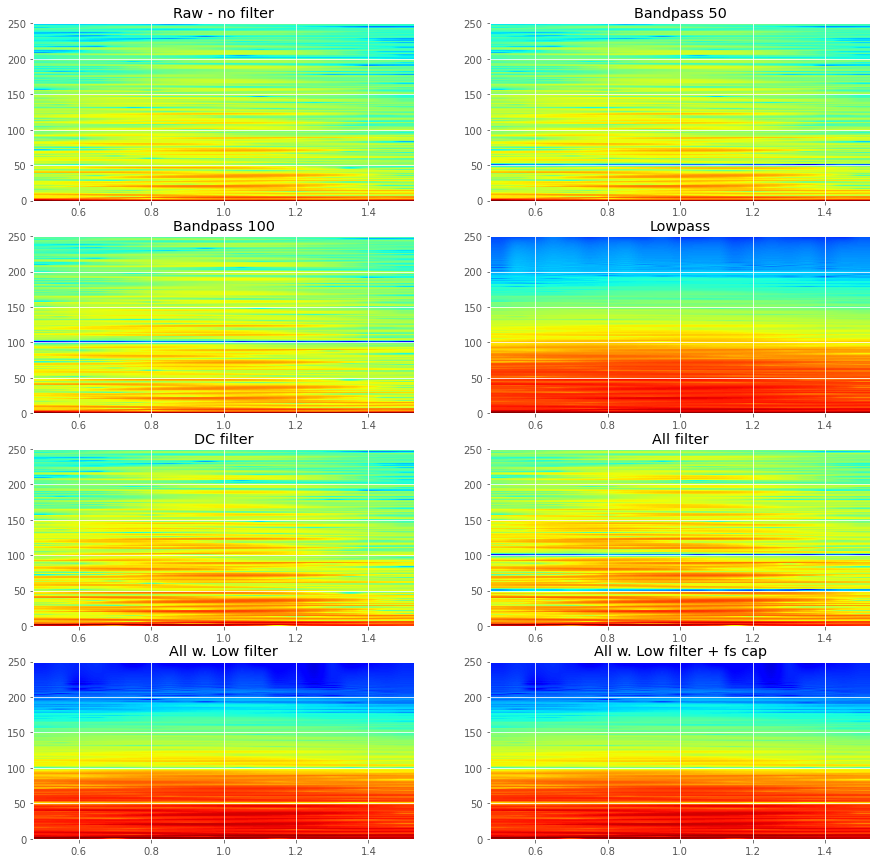

In [185]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15,15), sharey=False, sharex = False)
Pxx, freqs, bins, im = ax1.specgram(sze, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet')
ax1.set_title('Raw - no filter')
Pxx, freqs, bins, im = ax2.specgram(band_pass_50, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet')
ax2.set_title('Bandpass 50')
Pxx, freqs, bins, im = ax3.specgram(band_pass_100, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet')
ax3.set_title('Bandpass 100')
Pxx, freqs, bins, im = ax4.specgram(lowpass, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet')
ax4.set_title('Lowpass')
Pxx, freqs, bins, im = ax5.specgram(highpass, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet')
ax5.set_title('DC filter')
Pxx, freqs, bins, im = ax6.specgram(all, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet')
ax6.set_title('All filter')
Pxx, freqs, bins, im = ax7.specgram(all_low, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet')
ax7.set_title('All w. Low filter')
Pxx, freqs, bins, im = ax8.specgram(all_low, NFFT=500, Fs=500, noverlap=int(500 * 0.95), cmap='jet', scale_by_freq=False)
#ax8.axis(ymin=0, ymax=120)
ax8.set_title('All w. Low filter + fs cap')


for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Hz')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [186]:
all_inte = butter_bandstop_filter(inte, 97, 103, FREQ, order=6)
all_inte = butter_bandstop_filter(all_inte, 47, 53, FREQ, order=6)
all_inte = butter_highpass_filter(all_inte, 1, FREQ, order=6)

In [187]:
den_sz = denoise_wavelet(np.array(sze).astype(np.float),wavelet='db6', method='BayesShrink', mode='hard',rescale_sigma=True, multichannel=False, wavelet_levels=1)
den_inte = denoise_wavelet(np.array(inte).astype(np.float),wavelet='db6', method='BayesShrink', mode='soft',rescale_sigma=True, multichannel=False, wavelet_levels=1)

all_den_sz = butter_bandstop_filter(den_sz, 97, 103, FREQ, order=6)
all_den_sz = butter_bandstop_filter(all_den_sz, 47, 53, FREQ, order=6)
all_den_sz = butter_highpass_filter(all_den_sz, 1, FREQ, order=6)

all_den_inte = butter_bandstop_filter(den_inte, 97, 103, FREQ, order=6)
all_den_inte = butter_bandstop_filter(all_den_inte, 47, 53, FREQ, order=6)
all_den_inte = butter_highpass_filter(all_den_inte, 1, FREQ, order=6)

all_low_sz = butter_bandstop_filter(sze, 97, 103, FREQ, order=6)
all_low_sz = butter_bandstop_filter(all_low_sz, 47, 53, FREQ, order=6)
all_low_sz = butter_highpass_filter(all_low_sz, 1, FREQ, order=6)
all_low_sz = butter_lowpass_filter(all_low_sz, 100, 500, order=1)

all_low_inte = butter_bandstop_filter(inte, 97, 103, FREQ, order=6)
all_low_inte = butter_bandstop_filter(all_low_inte, 47, 53, FREQ, order=6)
all_low_inte = butter_highpass_filter(all_low_inte, 1, FREQ, order=6)
all_low_inte = butter_lowpass_filter(all_low_inte, 100, 500, order=1)

(0.253, 1.7469999999999999, 0.0, 120.0)

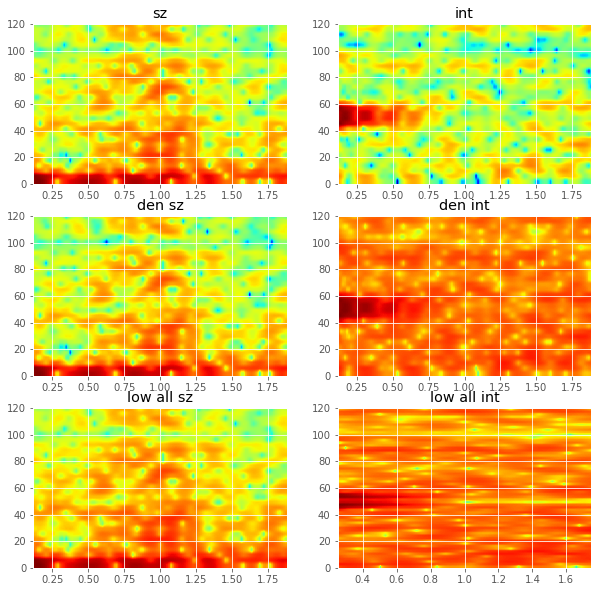

In [188]:
nft = int(FREQ/4)
nover = int(nft*0.95)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,10), sharey=False, sharex = False)
Pxx, freqs, bins, im = ax1.specgram(all, NFFT=nft, Fs=500, noverlap=nover, cmap='jet')
ax1.set_title('sz')
ax1.axis(ymin=0, ymax=120)
Pxx, freqs, bins, im = ax2.specgram(all_inte, NFFT=nft, Fs=500, noverlap=nover, cmap='jet')
ax2.set_title('int')
ax2.axis(ymin=0, ymax=120)

Pxx, freqs, bins, im = ax3.specgram(all_den_sz, NFFT=nft, Fs=500, noverlap=nover, cmap='jet')
ax3.set_title('den sz')
ax3.axis(ymin=0, ymax=120)
Pxx, freqs, bins, im = ax4.specgram(all_den_inte, NFFT=nft, Fs=500, noverlap=nover, cmap='jet')
ax4.set_title('den int')
ax4.axis(ymin=0, ymax=120)

Pxx, freqs, bins, im = ax5.specgram(all_low_sz, NFFT=nft, Fs=500, noverlap=nover, cmap='jet')
ax5.set_title('low all sz')
ax5.axis(ymin=0, ymax=120)
Pxx, freqs, bins, im = ax6.specgram(all_low_inte, NFFT=256, Fs=500, noverlap=int(256*0.99), cmap='jet')
ax6.set_title('low all int')
ax6.axis(ymin=0, ymax=120)




In [266]:
Fs = 500       # Define the sampling frequency,
interval = int(Fs/4)   # ... the interval size,
overlap = int(interval * 0.8)  # ... and the overlap intervals

Text(0.5, 0, 'Time (sec)')

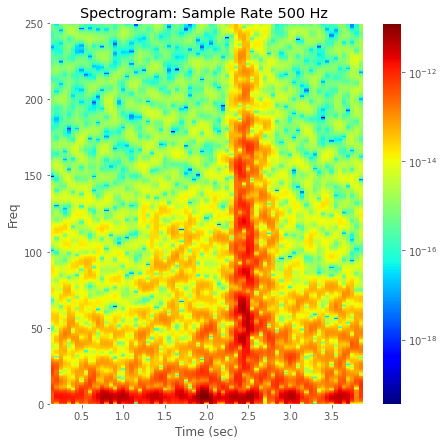

In [267]:
import matplotlib
import pylab
import matplotlib.colors as colors
from scipy.stats import lognorm





f, t, Sxx = signal.spectrogram(np.array(sze), fs=Fs, nperseg=interval, noverlap=overlap, nfft=1028, window='hann')
plt.figure(figsize=(7,7))
#Sxx = 10*np.log10(Sxx)
normalize_color= colors.LogNorm(vmin=np.amin(Sxx), vmax=np.amax(Sxx))
plt.pcolormesh(t, f, Sxx, cmap='jet', norm=normalize_color)# Plot the result
plt.colorbar()
plt.title("Spectrogram: Sample Rate 500 Hz ")
plt.ylabel("Freq")
plt.xlabel("Time (sec)")




array([[7.77970473e-16, 3.34131620e-17, 7.11144283e-18, 1.06587010e-15,
        2.39666564e-15, 1.24616056e-16, 2.77922634e-15, 2.08952237e-16,
        3.58087079e-16, 7.19456375e-18, 5.39059705e-18, 8.65991137e-16,
        5.90416377e-17, 7.64556735e-17, 8.56985413e-16, 2.75109045e-19,
        1.18515752e-17, 1.43431754e-16, 2.16235332e-15, 1.87733604e-15,
        1.27576519e-15],
       [2.18193769e-15, 3.32480642e-15, 5.33600874e-15, 8.88678137e-15,
        1.27218417e-14, 2.10967253e-14, 2.49749542e-14, 2.04847179e-14,
        2.05081551e-14, 1.93841962e-14, 1.19382506e-14, 9.12622139e-15,
        1.10965172e-14, 9.65765991e-15, 7.03163897e-15, 6.19780223e-15,
        8.90173380e-15, 5.84641720e-15, 3.07709886e-15, 3.01310870e-15,
        3.51940376e-15]])

Text(0, 0.5, 'Freq')

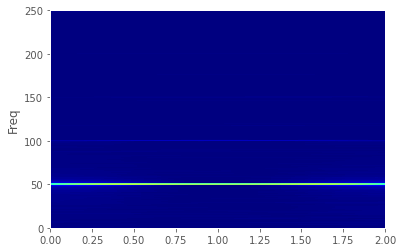

In [ ]:
f, t, Zxx = signal.stft(inte, fs=Fs, nperseg=FREQ, noverlap=FREQ*0.99)
plt.pcolormesh(t, f, 10*np, cmap='jet')
plt.ylabel("Freq")



(array([[5.49003766e-14, 2.08523249e-15, 5.19470508e-15, ...,
         3.32670532e-15, 7.69669873e-16, 2.34051345e-16],
        [5.92613998e-14, 1.42018500e-14, 8.11503575e-15, ...,
         1.33686458e-14, 4.79594557e-15, 1.24976894e-15],
        [5.00652147e-14, 2.11405356e-14, 2.58543052e-15, ...,
         6.25268038e-14, 8.65616222e-15, 3.67517278e-15],
        ...,
        [2.99151731e-25, 9.61646787e-26, 5.48177472e-27, ...,
         2.15754452e-27, 1.37841985e-26, 7.33300049e-28],
        [2.95042306e-25, 9.27798149e-26, 1.62773015e-27, ...,
         1.06421262e-27, 1.25866358e-26, 5.68541878e-28],
        [1.46839610e-25, 4.58289915e-26, 1.74032386e-28, ...,
         3.51331300e-28, 6.09537569e-27, 2.58763475e-28]]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,

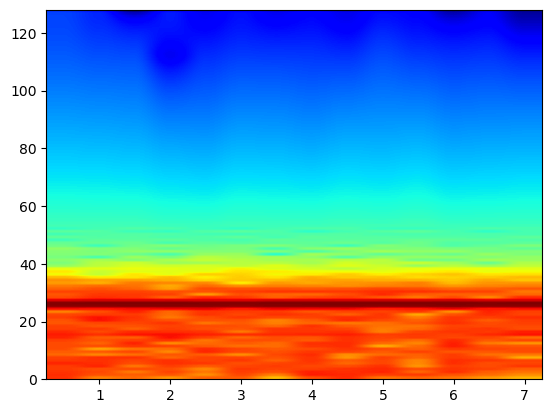

In [ ]:
plt.specgram(filtered_int, cmap='jet', Fs=256)
#plt.savefig("hi.png")

In [ ]:
def butter_bandstop_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    i, u = signal.butter(order, [low, high], btype='bandstop')
    y = signal.lfilter(i, u, data)
    return y

In [ ]:
fs=256
lowcut=117
highcut=123
y=butter_bandstop_filter(den_sz, lowcut, highcut, fs, order=6)

lowcut=57
highcut=63
y=butter_bandstop_filter(y, lowcut, highcut, fs, order=6)

In [ ]:
freqs, bins,Pxx =signal.spectrogram(y, nfft=256, fs=256, return_onesided=True, noverlap=256*0.95)

In [ ]:
Pxx = np.delete(Pxx, np.s_[117:123+1], axis=0)
Pxx = np.delete(Pxx, np.s_[57:63+1], axis=0)
Pxx = np.delete(Pxx, 0, axis=0)

In [ ]:
freqs = np.arange(Pxx.shape[0])

/var/folders/0v/m6wt8rqj7s1dcljdyjrdfxmw0000gn/T/ipykernel_8701/1495177456.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(freqs, bins, 10*np.log10(np.transpose(Pxx)),cmap=plt.cm.jet)


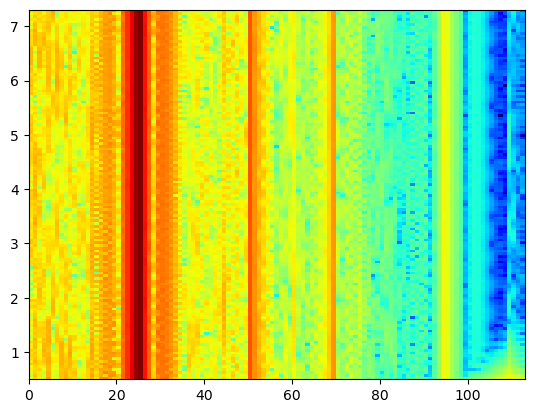

In [ ]:
plt.pcolormesh(freqs, bins, 10*np.log10(np.transpose(Pxx)),cmap=plt.cm.jet)

In [ ]:
result=(10*np.log10(np.transpose(Pxx))-(10*np.log10(np.transpose(Pxx))).min())/(10*np.log10(np.transpose(Pxx))).ptp()

/var/folders/0v/m6wt8rqj7s1dcljdyjrdfxmw0000gn/T/ipykernel_8701/42712137.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(freqs, bins, result,cmap=plt.cm.jet)


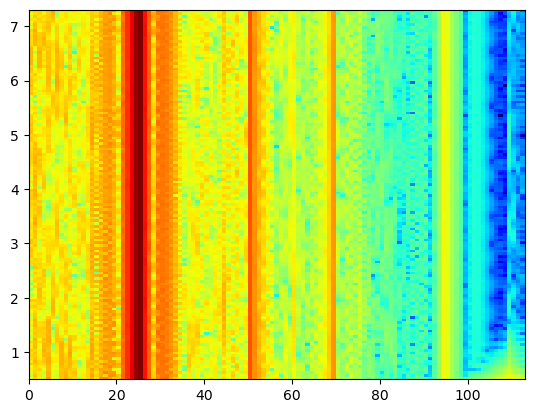

In [ ]:
freqs = np.arange(result.shape[1])
plt.pcolormesh(freqs, bins, result,cmap=plt.cm.jet)

In [ ]:
plt.style.use('default')
plt.specgram(filtered, Fs=256, NFFT=128, noverlap=256/8, cmap='jet')


NameError: name 'filtered' is not defined

In [ ]:
datetime.fromtimestamp(-2208984384000/1000).strftime('%H:%M:%S')

'02:13:36'

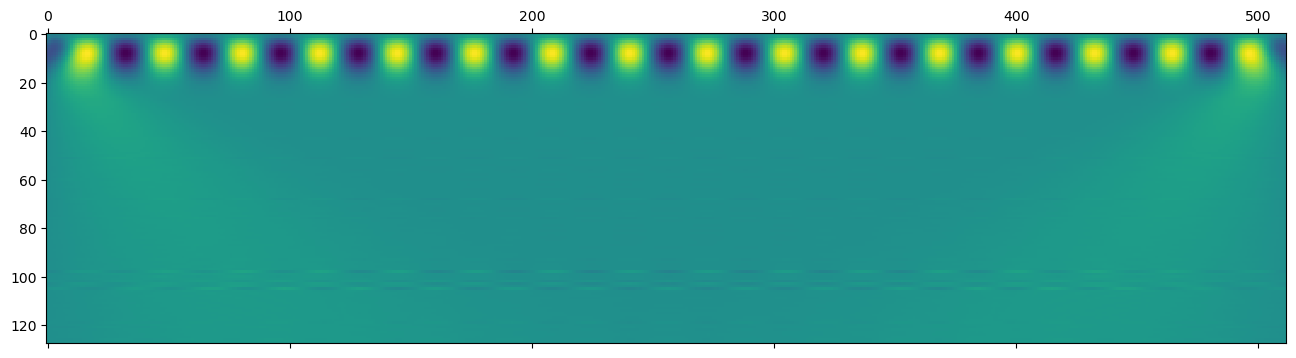

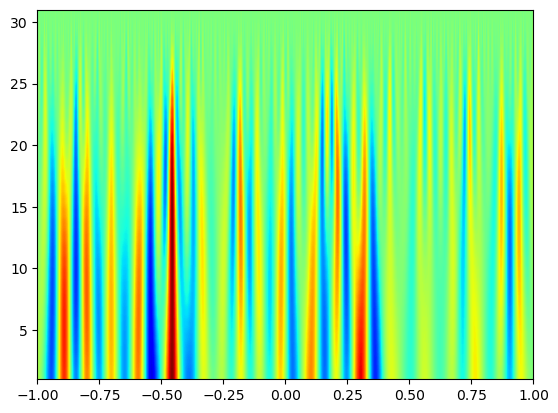

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef) # doctest: +SKIP
plt.show() # doctest: +SKIP

import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(inte, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='jet', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show() # doctest: +SKIP